In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display

import seaborn as sns

In [35]:
input_file = 'train.csv'

features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
# 6 - intern memory / 13 - ram
target = 'price_range'

df = pd.read_csv(input_file)

df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

### Passo 1: Definir o número de classes a serem divididas para cada coluna


### Passo 2: Definir a amplitude de cada classe


### Passo 3: Definir os limites de cada classe


### Passo 4: Definir a frequência de cada classe

----------------- battery_power -----------------
188
[689, 877, 1065, 1253, 1441, 1629, 1817, 2005]
[500, 688, 876, 1064, 1252, 1440, 1628, 1816]


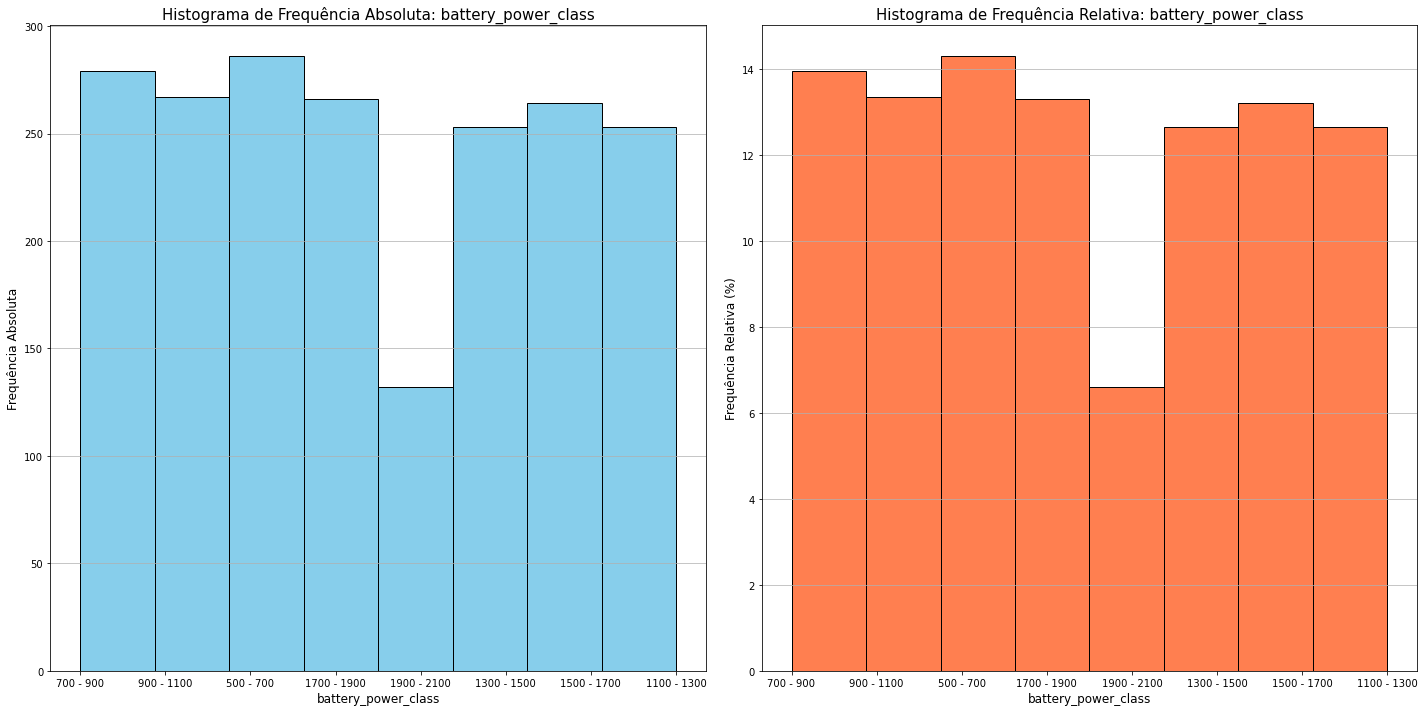

----------------- clock_speed -----------------
0.25
[0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]
[0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75]


TypeError: 'value' must be an instance of str or bytes, not a float

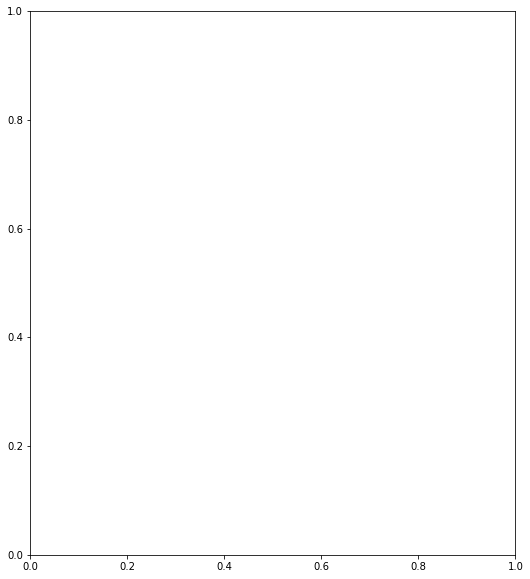

In [69]:
def estilo_tabela(val):
    return 'text-align: center;'

def plot_histogram(column, bins):
    # Set up the figure with two subplots
    plt.figure(figsize=(20, 10))
    plt.subplots_adjust(wspace=0.3)

    # Histogram of absolute frequencies
    plt.subplot(1, 2, 1)
    n, bins, patches = plt.hist(df[column], bins=bins, edgecolor='black', color='skyblue')
    plt.title(f'Histograma de Frequência Absoluta: {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequência Absoluta', fontsize=12)
    plt.grid(axis='y', alpha=0.9)

    # Histogram of relative frequencies
    plt.subplot(1, 2, 2)
    weights = (np.ones_like(df[column]) / len(df[column])) * 100  # Weights to convert counts to percentages
    n, bins, patches = plt.hist(df[column], bins=bins, weights=weights, edgecolor='black', color='coral')
    plt.title(f'Histograma de Frequência Relativa: {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequência Relativa (%)', fontsize=12)
    plt.grid(axis='y', alpha=0.9)

    # Display the plot
    plt.tight_layout()
    plt.show()
    
def describe(name_column, bins_lenght):
    if name_column == 'battery_power':
        # min = 501, max = 1998
        # o número de classes é 15
        bins_lenght = 8
        amplitude = math.ceil((1998 - 501)/bins_lenght)
        print(amplitude)
        max_limits = [501 + amplitude * i for i in range(1, 9)]
        min_limits = [500 + amplitude * i for i in range(0, 8)]
        print(max_limits)
        print(min_limits)
        # criar uma nova coluna classificando os valores de ram com os novos rótulos
        
        df['battery_power_class'] = pd.cut(df['battery_power'], bins=[500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100], labels=['500 - 700', '700 - 900', '900 - 1100', '1100 - 1300', '1300 - 1500', '1500 - 1700', '1700 - 1900', '1900 - 2100'])
        
        class_summary = df['battery_power_class'].value_counts().sort_index().rename('frequency').to_frame()
        # print(df['battery_power_class'])
        
    if name_column == 'clock_speed':
        # min = 0.5, max = 3
        # o número de classes é 10
        bins_lenght = 10
        amplitude = (3.0 - 0.5)/bins_lenght
        print(amplitude)
        max_limits = [0.5 + amplitude * i for i in range(1, 11)]
        min_limits = [0.5 + amplitude * i for i in range(0, 10)]
        min_limits[0] = 0.5
        print(max_limits)
        print(min_limits)
        # criar uma nova coluna classificando os valores de ram com os novos rótulos
        df['clock_speed_class'] = pd.cut(df['clock_speed'], bins=[0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3], labels=['0.5 - 0.75', '0.75 - 1', '1 - 1.25', '1.25 - 1.5', '1.5 - 1.75', '1.75 - 2', '2 - 2.25', '2.25 - 2.5', '2.5 - 2.75', '2.75 - 3'])
        class_summary = df['clock_speed_class'].value_counts().sort_index().rename('frequency').to_frame()
        # print(df['clock_speed_class'])
        
    if name_column == 'ram':
        # min = 256, max = 3998
        # o número de classes é 15
        bins_lenght = 15
        amplitude = math.ceil((3998 - 256)/bins_lenght)
        print(amplitude)
        max_limits = [256 + amplitude * i for i in range(1, 16)]
        min_limits = [255 + amplitude * i for i in range(0, 15)]
        print(max_limits)
        print(min_limits)
        # criar uma nova coluna classificando os valores de ram com os novos rótulos
        df['ram_class'] = pd.cut(df['ram'], bins=[255, 506, 756, 1006, 1256, 1506, 1756, 2006, 2256, 2506, 2756, 3006, 3256, 3506, 3756, 4006], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
        class_summary = df['ram_class'].value_counts().sort_index().rename('frequency').to_frame()
        # print(df['ram_class'])
        
        # salvar novo dataset como csv
        # df.to_csv('train_output.csv', index=False)
    if name_column == 'int_memory':
        # min = 2, max = 64
        # o número de classes é 8
        bins_lenght = 8
        amplitude = math.ceil((64 - 2)/bins_lenght)
        print(amplitude)
        max_limits = [2 + amplitude * i for i in range(1, 9)]
        min_limits = [2 + amplitude * i  for i in range(0, 8)]
        min_limits[0] = 1
        print(max_limits)
        print(min_limits)
        # criar uma nova coluna classificando os valores de ram com os novos rótulos
        
        df['int_memory_class'] = pd.cut(df['int_memory'], bins=[1, 9, 17, 25, 33, 41, 49, 57, 65], labels=[1, 2, 3, 4, 5, 6, 7, 8])
        
        class_summary = df['int_memory_class'].value_counts().sort_index().rename('frequency').to_frame()
        # print(df['int_memory_class'])
        
        # salvar novo dataset como csv
        # df.to_csv('train_output.csv', index=False)
    
    if name_column == 'n_cores':
        # min = 1, max = 8
        # o número de classes é 8
        bins_lenght = 8
        amplitude = math.ceil((8 - 1)/bins_lenght)
        print(amplitude)
        max_limits = [1 + amplitude * i for i in range(1, 9)]
        min_limits = [1 + amplitude * i for i in range(0, 8)]
        print(max_limits)
        print(min_limits)
        # criar uma nova coluna classificando os valores de ram com os novos rótulos
        
        df['n_cores_class'] = pd.cut(df['n_cores'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8], labels=['1 - 2', '2 - 4', '4 - 6', '6 - 8', '8 - 10', '10 - 12', '12 - 14', '14 - 16'])
        
        class_summary = df['n_cores_class'].value_counts().sort_index().rename('frequency').to_frame()
        # print(df['n_cores_class'])
        
    
    if name_column == 'fc':
        # min = 0, max = 19
        # o número de classes é 7
        bins_lenght = 7
        amplitude = math.ceil((19 - 0)/bins_lenght)
        print(amplitude)
        max_limits = [amplitude * i for i in range(1, 9)]
        min_limits = [amplitude * i for i in range(0, 8)]
        min_limits[0] = 0
        print(max_limits)
        print(min_limits)
        # criar uma nova coluna classificando os valores de camera frontal com os novos rótulos
        df['fc_class'] = pd.cut(df['fc'], bins=[0, 3, 6, 9, 12, 15, 18, 21], labels=[1, 2, 3, 4, 5, 6, 7])

        class_summary = df['fc_class'].value_counts().sort_index().rename('frequency').to_frame()
        
        
    # criar tabela visual com matplot com seguintes colunas: classe/rotulo, limite inferior, limite superior, frequencia absoluta, frequencia relativa, frequencia acumulada
    # Assuming df['ram_class'] is already created
    class_summary['lower_limit'] = min_limits
    class_summary['upper_limit'] = max_limits
    class_summary['relative_frequency'] = (class_summary['frequency'] / class_summary['frequency'].sum())*100
    class_summary['cumulative_frequency'] = class_summary['frequency'].cumsum()
    class_summary['cumulative_frequency_percentage'] = (class_summary['cumulative_frequency'] / class_summary['frequency'].sum())*100
    # print(class_summary.head(15))
    
    # Styling
    styled_df = class_summary.style.applymap(estilo_tabela) \
                                    .set_properties(**{'width': '100px'}) \
                                    .set_table_styles([{'selector': '', 'props': [('border', '1px solid black')]}])
    display(styled_df)
    plot_histogram(name_column + '_class', bins_lenght)
    # criar histograma com as classes
    # criar gráfico de pizza com as classes
    # criar gráfico de linha com as classes
    # df.to_csv('train_output.csv', index=False)

# columns = ['ram', 'int_memory', 'battery_power', 'n_cores', 'clock_speed']    
columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
# columns = features
bins = [15, 10, 7, 0, 0, 0 , 0 , 8]
# bins = [15, 8, 15, 8, 5]

for i in range(0, len(bins)):
    print('----------------- '+ columns[i] + ' -----------------')
    describe(columns[i], bins[i])



price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64
_________________________

n_cores
4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: count, dtype: int64
_________________________

blue
0    1010
1     990
Name: count, dtype: int64
_________________________

dual_sim
1    1019
0     981
Name: count, dtype: int64
_________________________

four_g
1    1043
0     957
Name: count, dtype: int64
_________________________

three_g
1    1523
0     477
Name: count, dtype: int64
_________________________

touch_screen
1    1006
0     994
Name: count, dtype: int64
_________________________

wifi
1    1014
0     986
Name: count, dtype: int64
_________________________


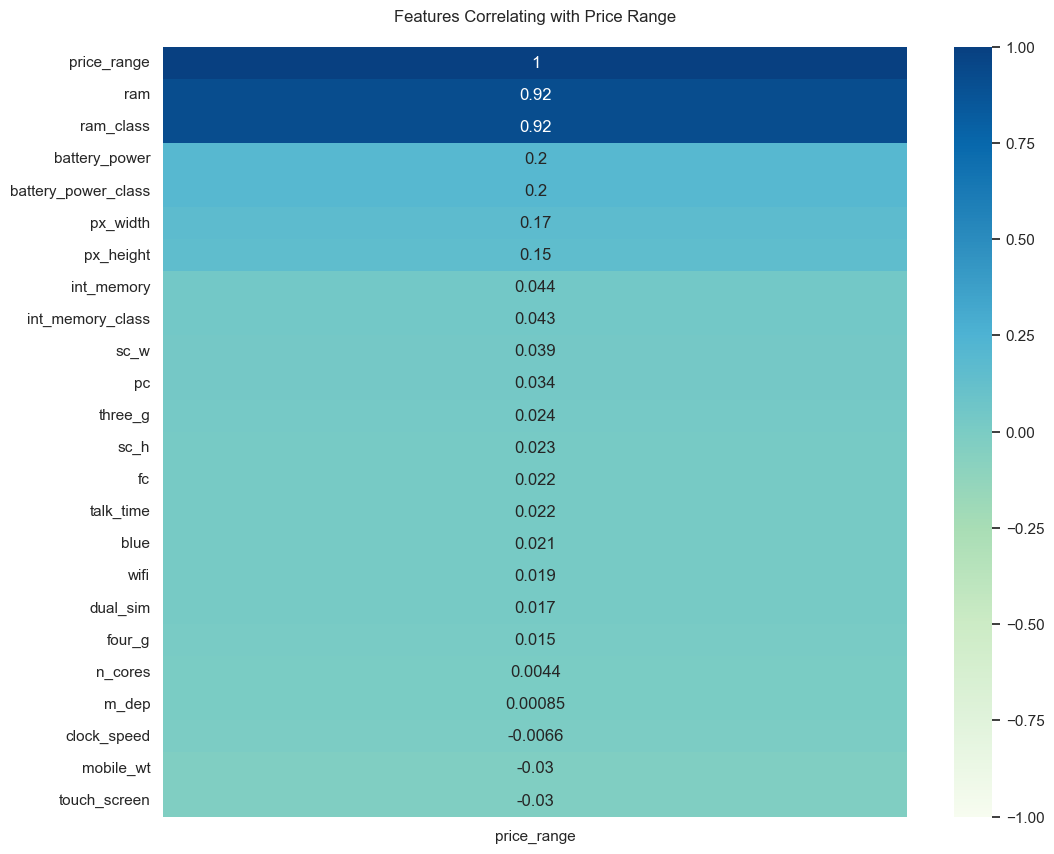

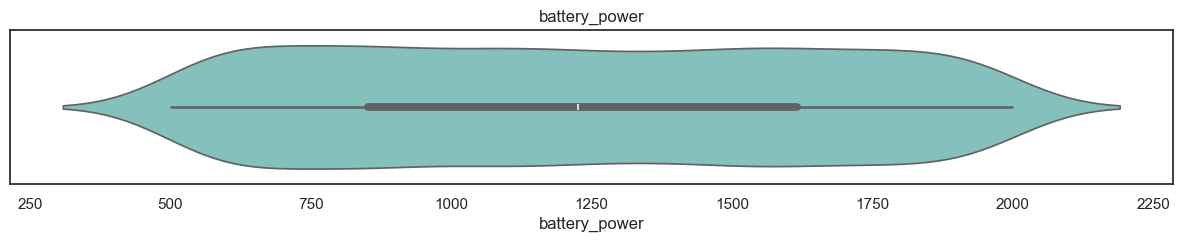

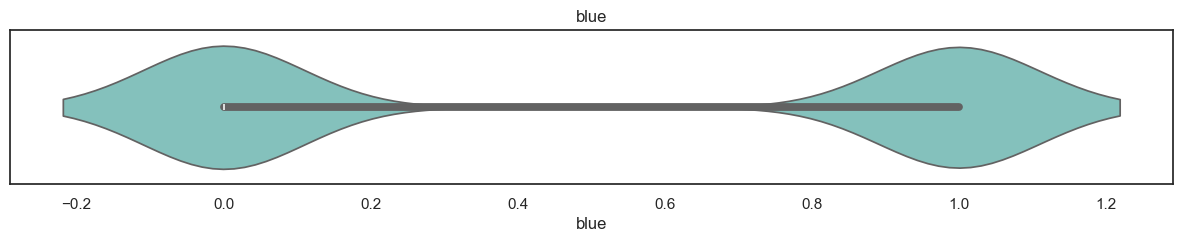

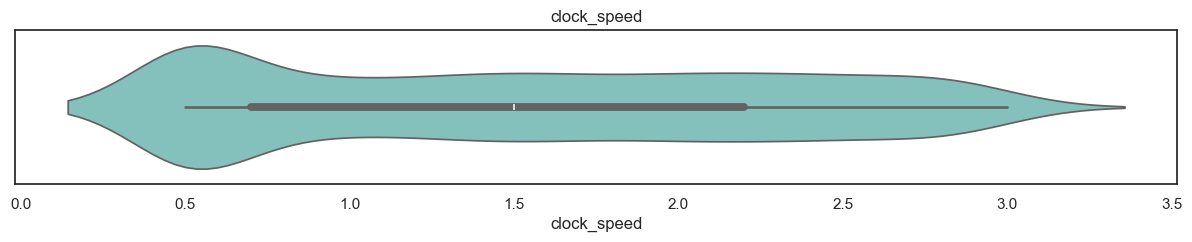

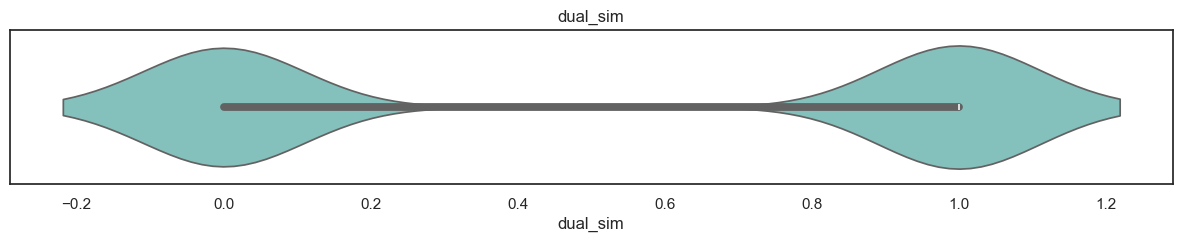

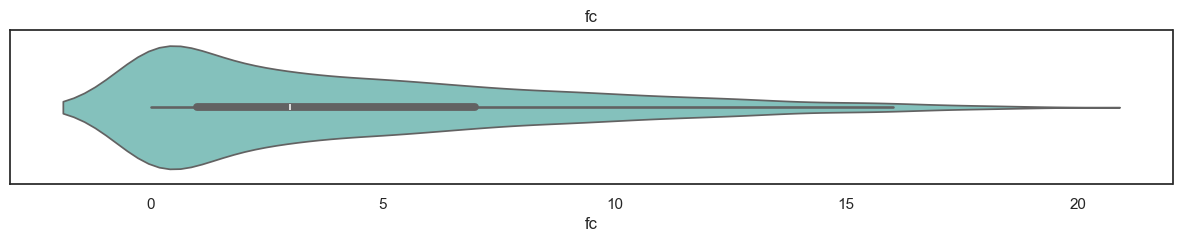

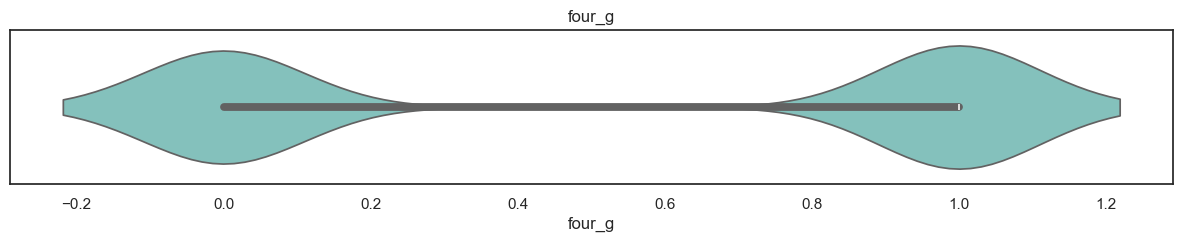

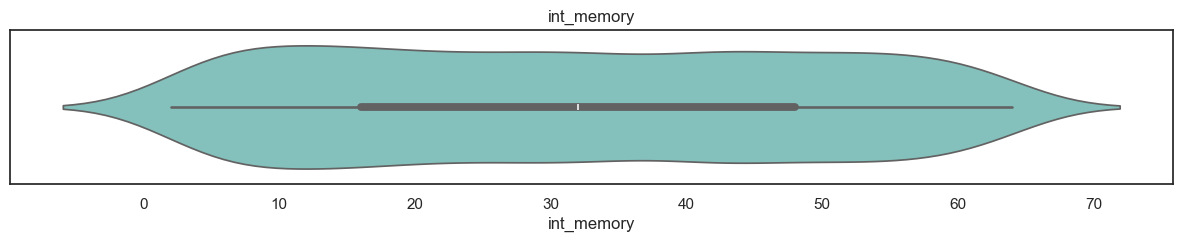

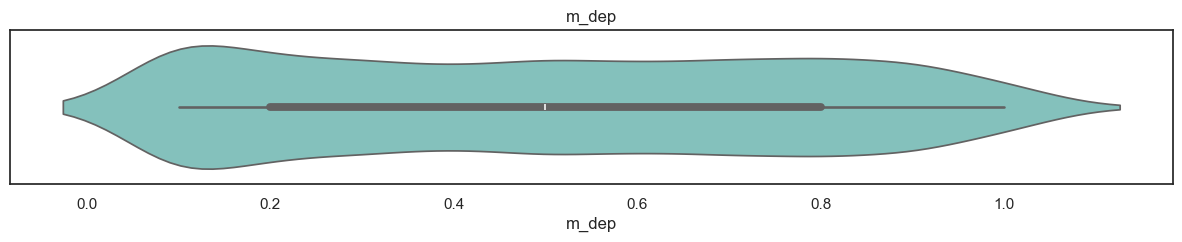

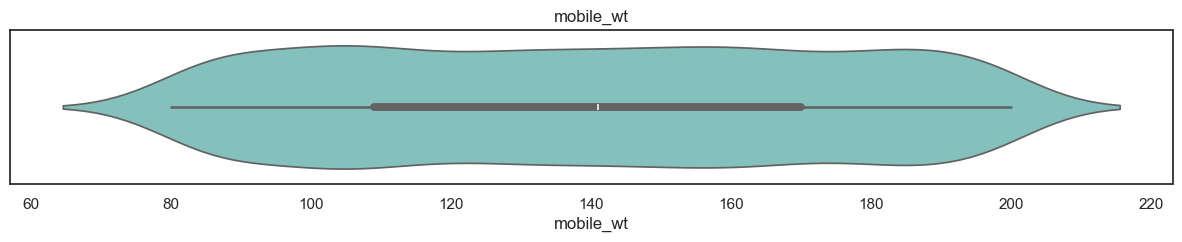

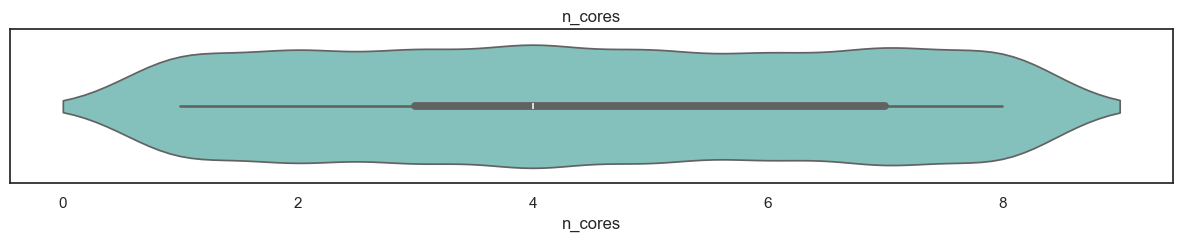

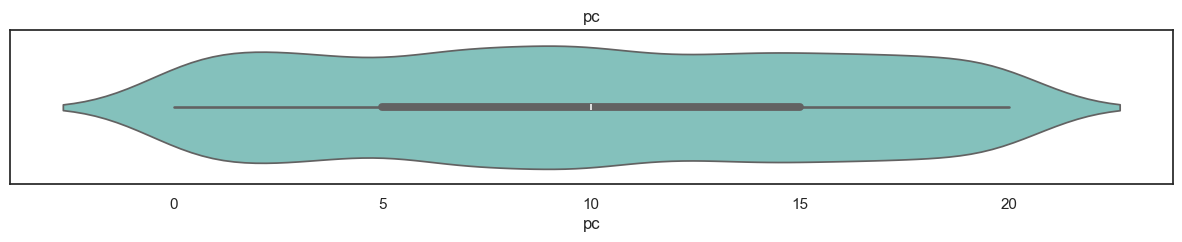

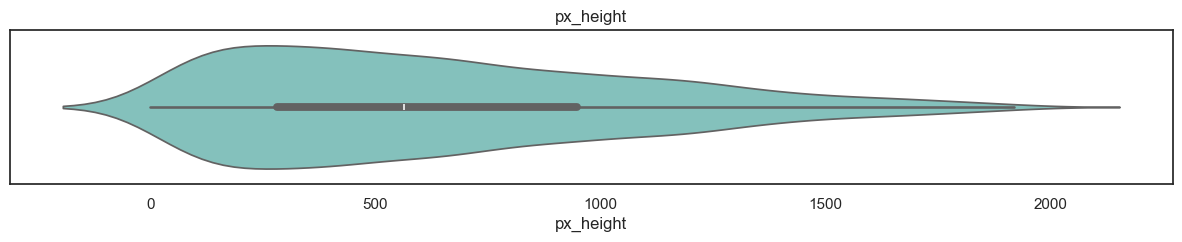

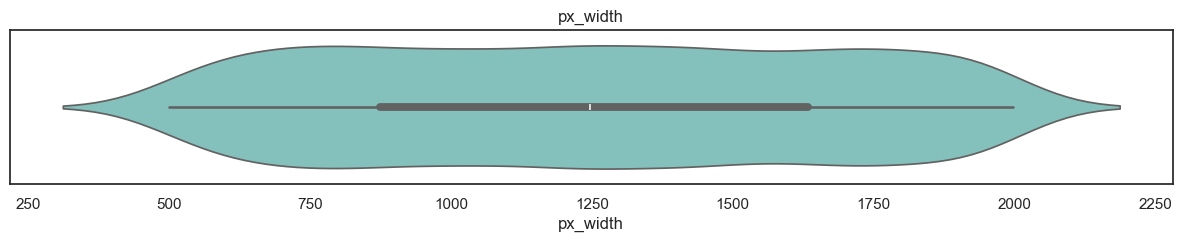

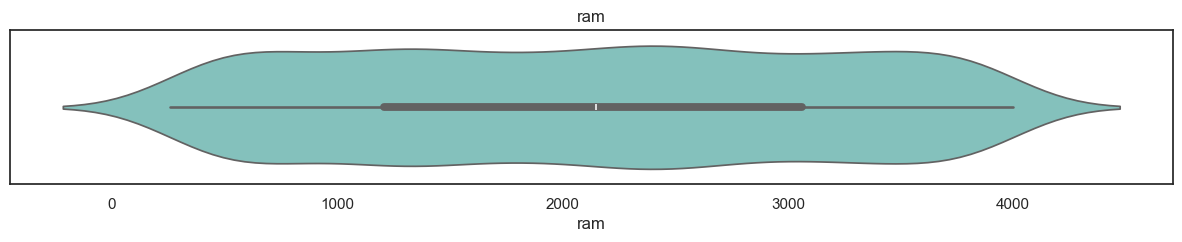

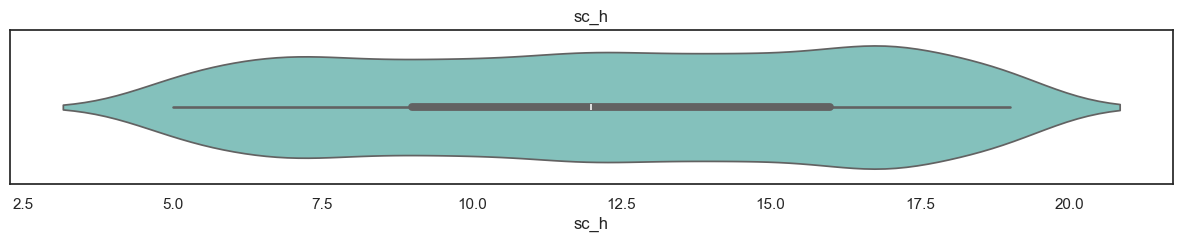

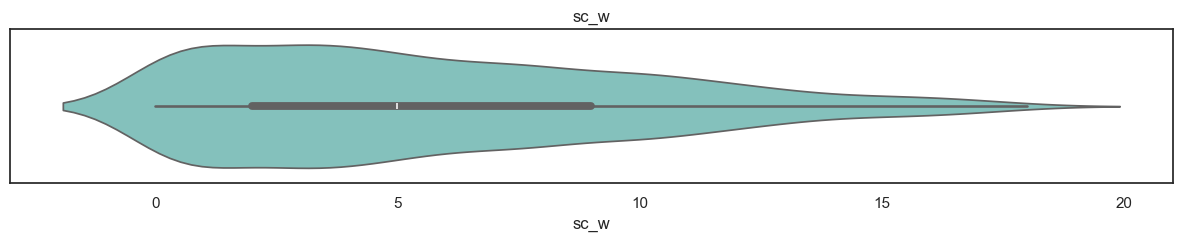

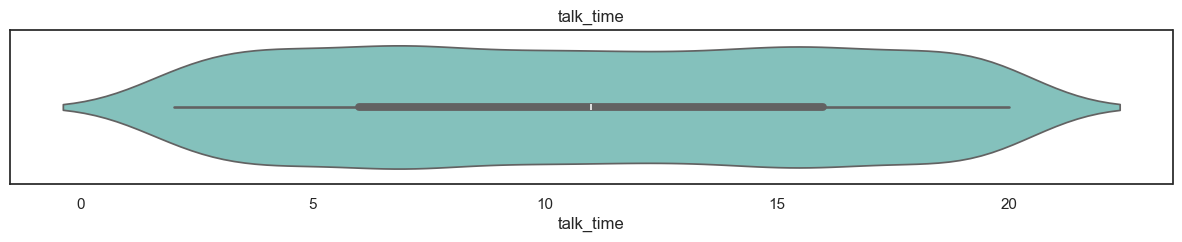

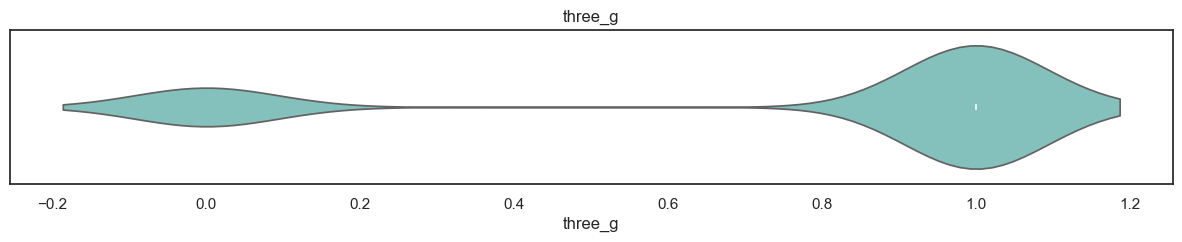

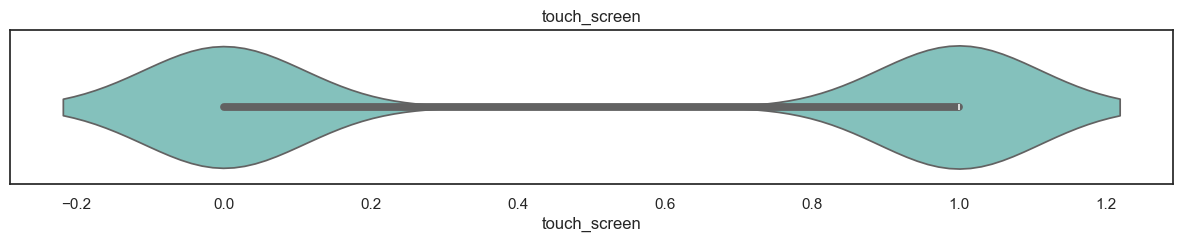

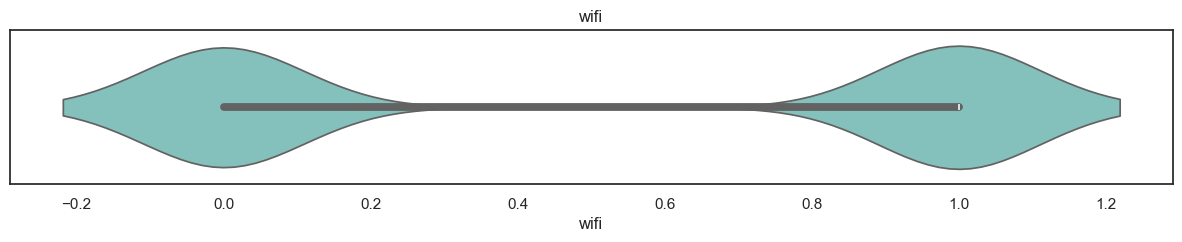


battery_power Statistics:
count: 2000.00, mean: 1238.52, std: 439.42, min: 501.00, 25%: 851.75, 50%: 1226.00, 75%: 1615.25, max: 1998.00


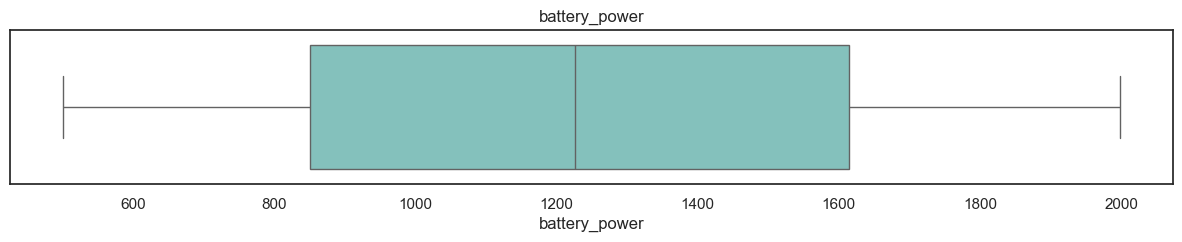


blue Statistics:
count: 2000.00, mean: 0.49, std: 0.50, min: 0.00, 25%: 0.00, 50%: 0.00, 75%: 1.00, max: 1.00


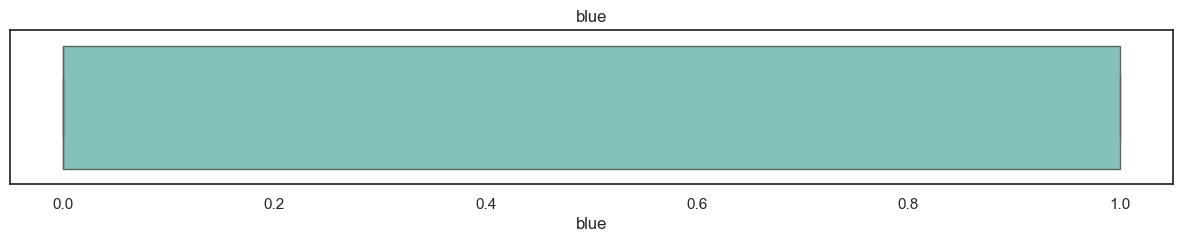


clock_speed Statistics:
count: 2000.00, mean: 1.52, std: 0.82, min: 0.50, 25%: 0.70, 50%: 1.50, 75%: 2.20, max: 3.00


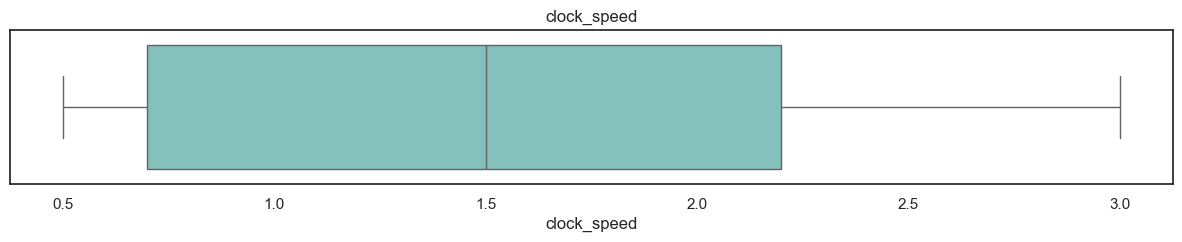


dual_sim Statistics:
count: 2000.00, mean: 0.51, std: 0.50, min: 0.00, 25%: 0.00, 50%: 1.00, 75%: 1.00, max: 1.00


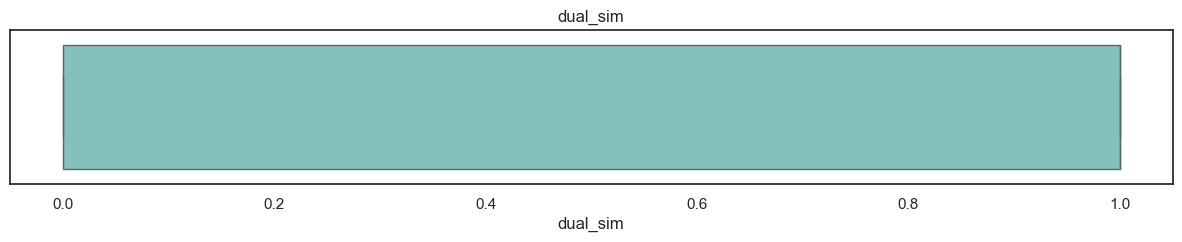


fc Statistics:
count: 2000.00, mean: 4.31, std: 4.34, min: 0.00, 25%: 1.00, 50%: 3.00, 75%: 7.00, max: 19.00


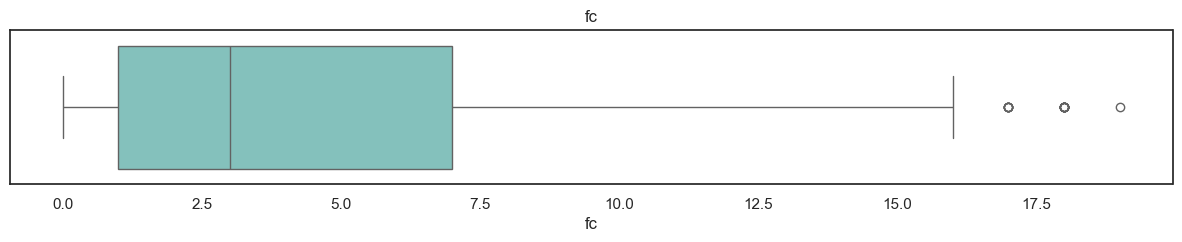


four_g Statistics:
count: 2000.00, mean: 0.52, std: 0.50, min: 0.00, 25%: 0.00, 50%: 1.00, 75%: 1.00, max: 1.00


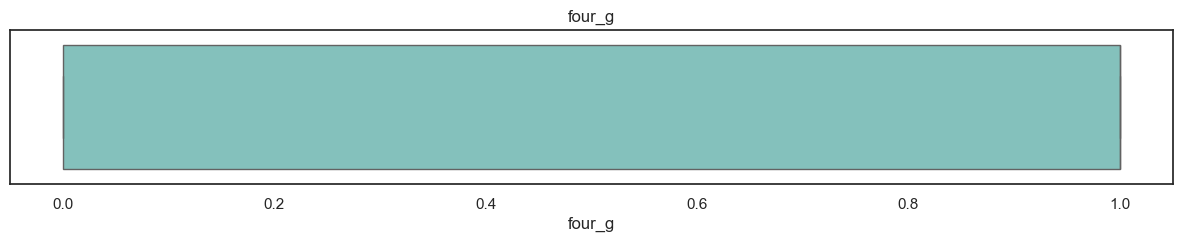


int_memory Statistics:
count: 2000.00, mean: 32.05, std: 18.15, min: 2.00, 25%: 16.00, 50%: 32.00, 75%: 48.00, max: 64.00


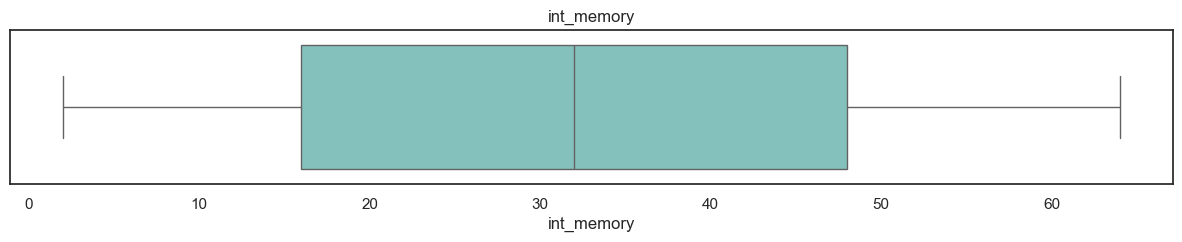


m_dep Statistics:
count: 2000.00, mean: 0.50, std: 0.29, min: 0.10, 25%: 0.20, 50%: 0.50, 75%: 0.80, max: 1.00


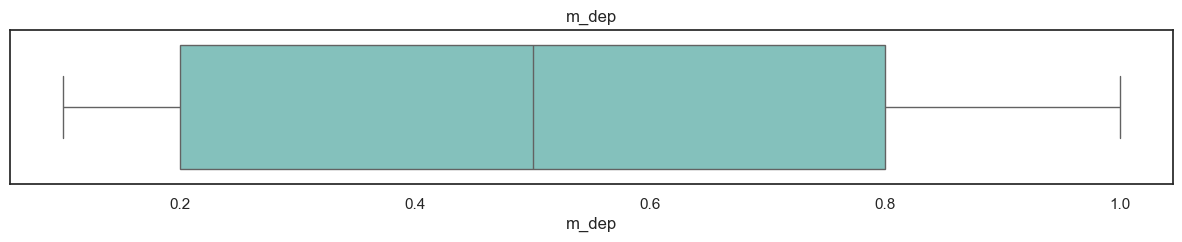


mobile_wt Statistics:
count: 2000.00, mean: 140.25, std: 35.40, min: 80.00, 25%: 109.00, 50%: 141.00, 75%: 170.00, max: 200.00


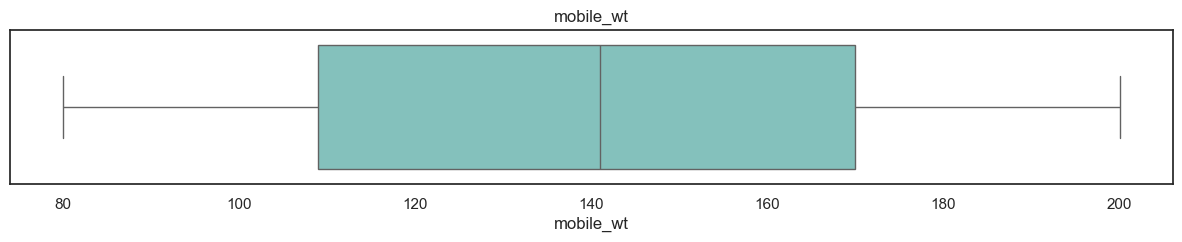


n_cores Statistics:
count: 2000.00, mean: 4.52, std: 2.29, min: 1.00, 25%: 3.00, 50%: 4.00, 75%: 7.00, max: 8.00


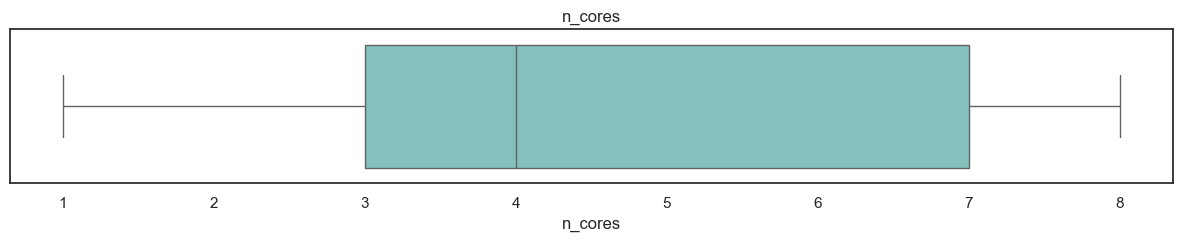


pc Statistics:
count: 2000.00, mean: 9.92, std: 6.06, min: 0.00, 25%: 5.00, 50%: 10.00, 75%: 15.00, max: 20.00


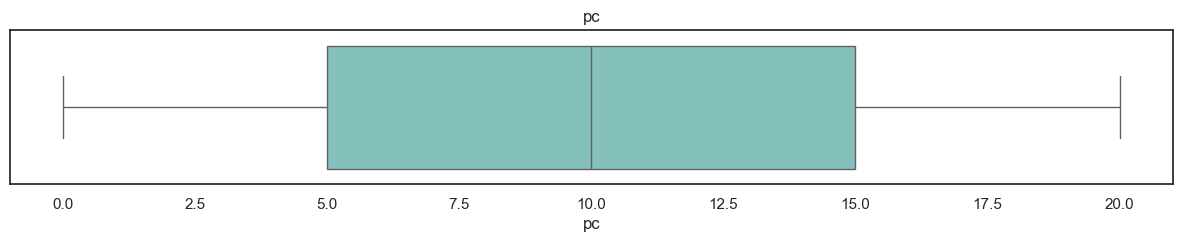


px_height Statistics:
count: 2000.00, mean: 645.11, std: 443.78, min: 0.00, 25%: 282.75, 50%: 564.00, 75%: 947.25, max: 1960.00


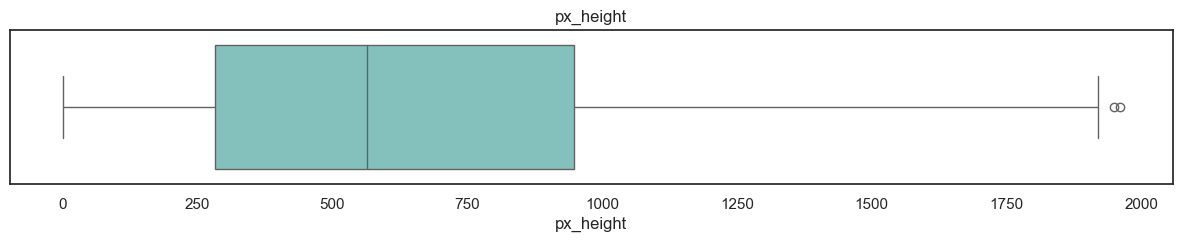


px_width Statistics:
count: 2000.00, mean: 1251.52, std: 432.20, min: 500.00, 25%: 874.75, 50%: 1247.00, 75%: 1633.00, max: 1998.00


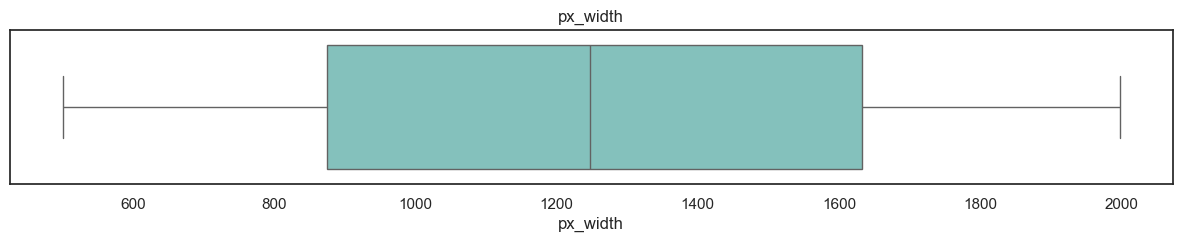


ram Statistics:
count: 2000.00, mean: 2124.21, std: 1084.73, min: 256.00, 25%: 1207.50, 50%: 2146.50, 75%: 3064.50, max: 3998.00


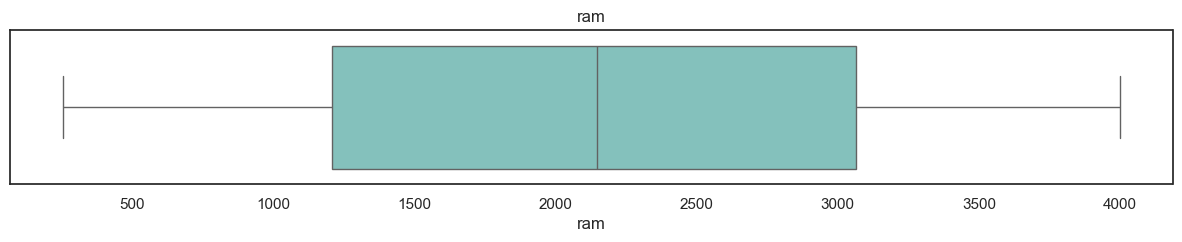


sc_h Statistics:
count: 2000.00, mean: 12.31, std: 4.21, min: 5.00, 25%: 9.00, 50%: 12.00, 75%: 16.00, max: 19.00


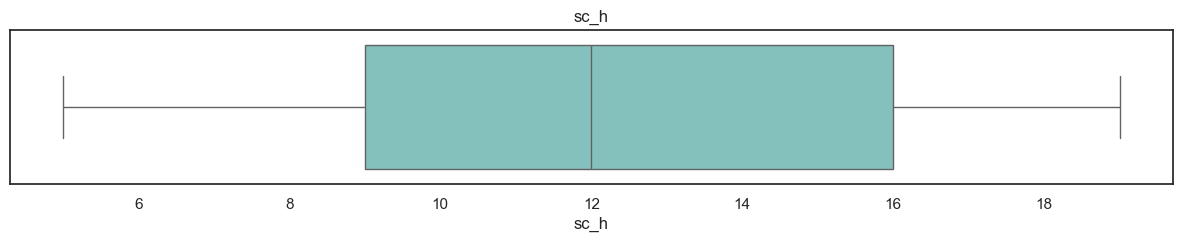


sc_w Statistics:
count: 2000.00, mean: 5.77, std: 4.36, min: 0.00, 25%: 2.00, 50%: 5.00, 75%: 9.00, max: 18.00


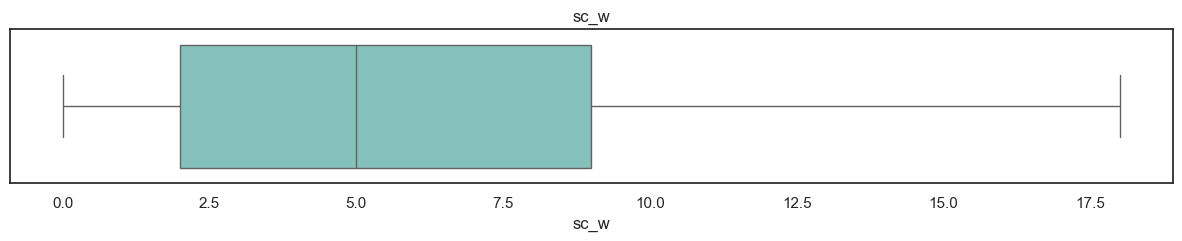


talk_time Statistics:
count: 2000.00, mean: 11.01, std: 5.46, min: 2.00, 25%: 6.00, 50%: 11.00, 75%: 16.00, max: 20.00


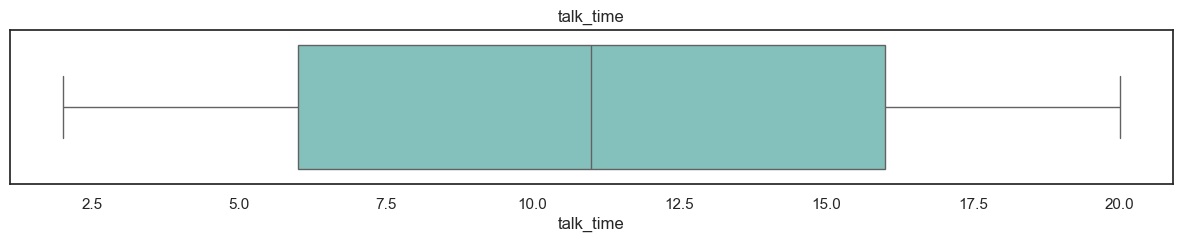


three_g Statistics:
count: 2000.00, mean: 0.76, std: 0.43, min: 0.00, 25%: 1.00, 50%: 1.00, 75%: 1.00, max: 1.00


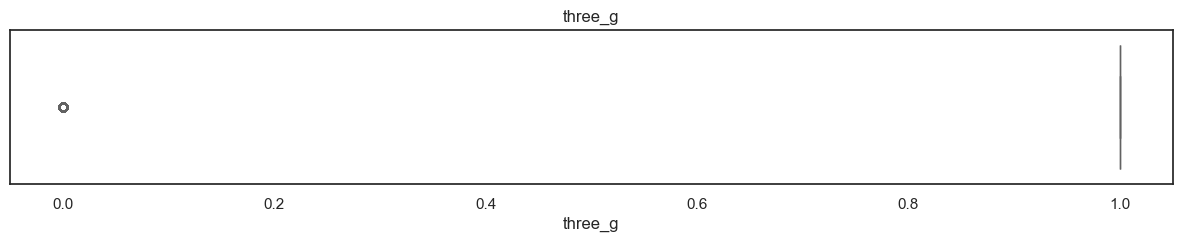


touch_screen Statistics:
count: 2000.00, mean: 0.50, std: 0.50, min: 0.00, 25%: 0.00, 50%: 1.00, 75%: 1.00, max: 1.00


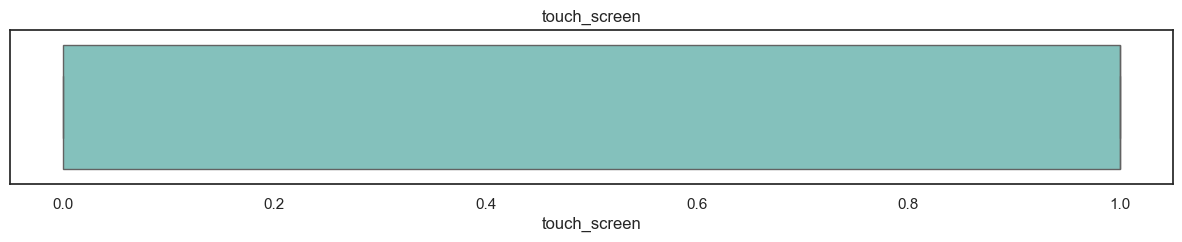


wifi Statistics:
count: 2000.00, mean: 0.51, std: 0.50, min: 0.00, 25%: 0.00, 50%: 1.00, 75%: 1.00, max: 1.00


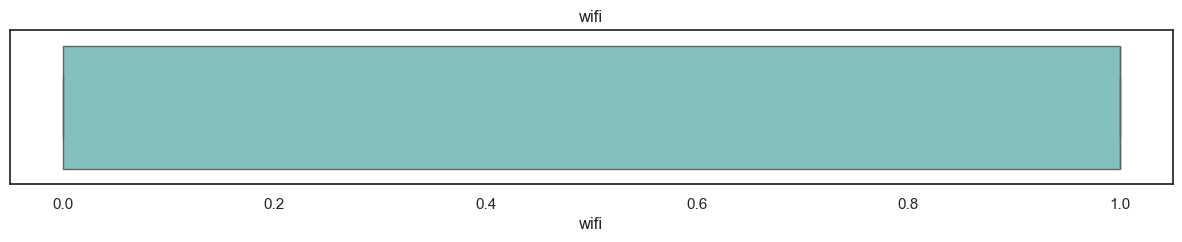

In [58]:
import warnings
warnings.filterwarnings('ignore')

#Contando os valores de cada coluna para conseguir categorizar
cols1 = ['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
for col in cols1:
    print(f"\n{df[col].value_counts()}")
    print('_'*25)


# plotando gráfico de Funcionalidades relacionando com preço
plt.figure (figsize = (12 , 10) , dpi = 100)
heatmap = sns.heatmap (df.corr()[['price_range']].sort_values (by = 'price_range', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'GnBu')
heatmap.set_title ('Features Correlating with Price Range', fontdict = {'fontsize':12} , pad = 18);

#ver as distribuições de maneira clara
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
palette ="GnBu"
for column in columns:
    plt.figure(figsize=(15,2))
    sns.violinplot(x=df[column], palette=palette)
    plt.title(column)
    plt.show()

#ver as distribuições de maneira clara
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
palette ="GnBu"
for column in columns:
    plt.figure(figsize=(15,2))
    sns.boxplot(x=df[column], palette=palette)
    plt.title(column)
    stats = df[column].describe()
    stats_text = ", ".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    print(f"\n{column} Statistics:\n{stats_text}")
    plt.show()



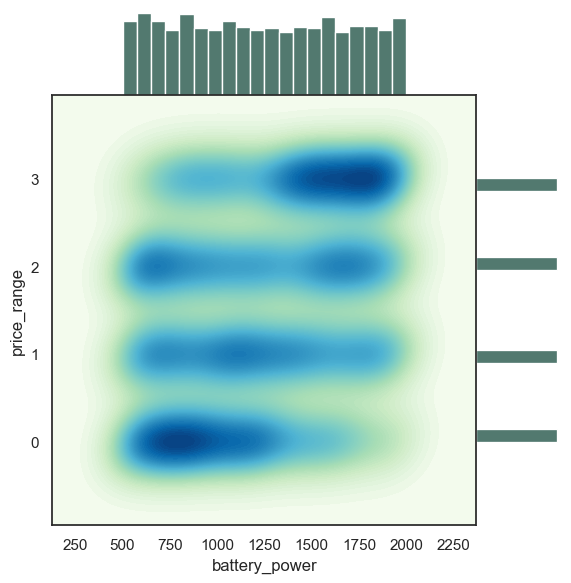

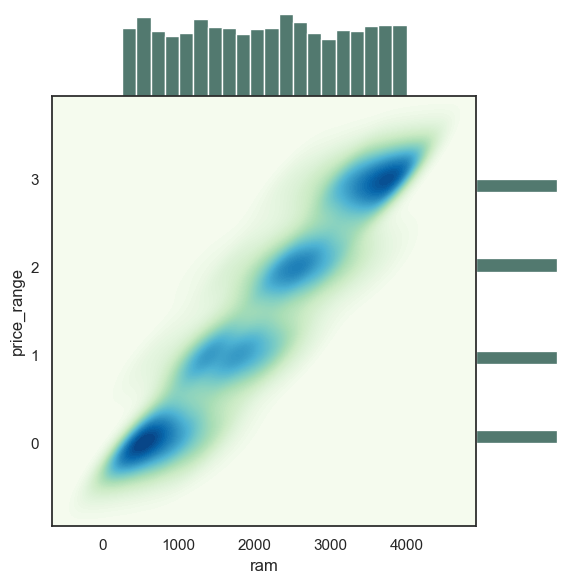

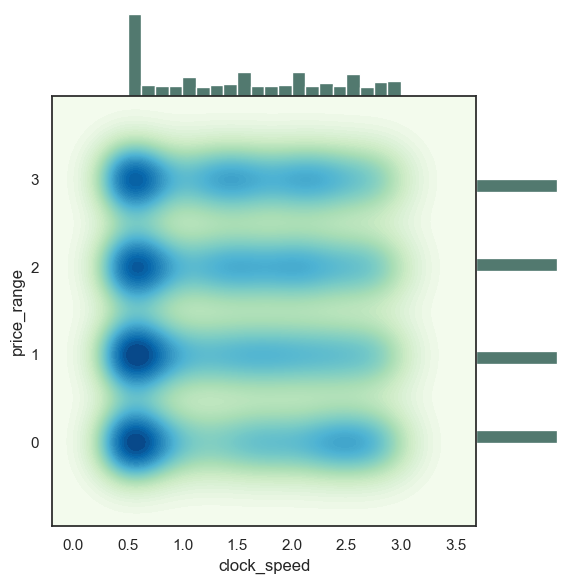

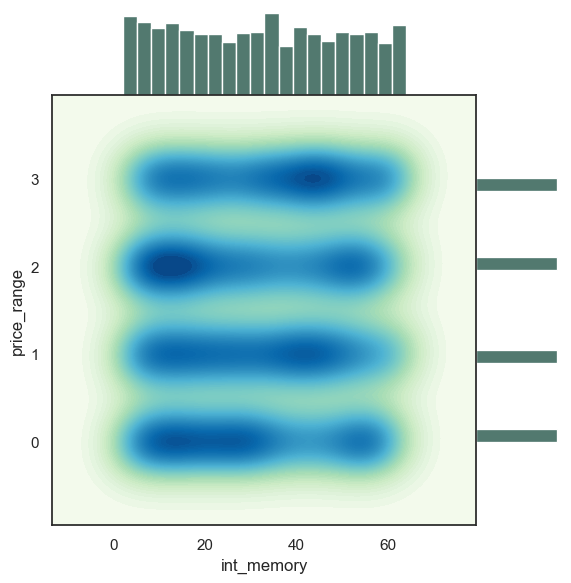

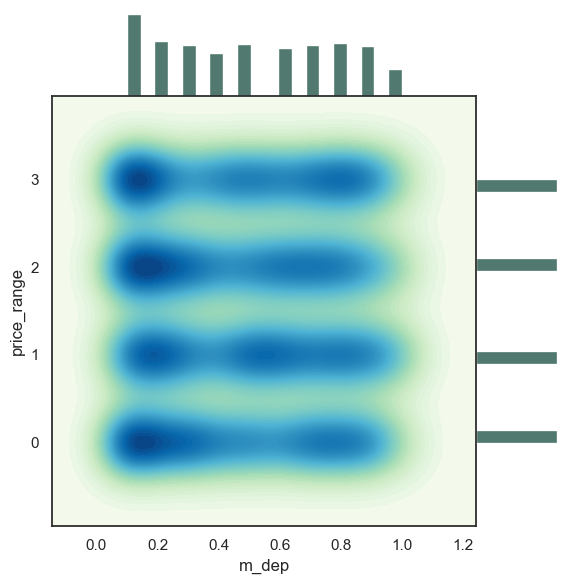

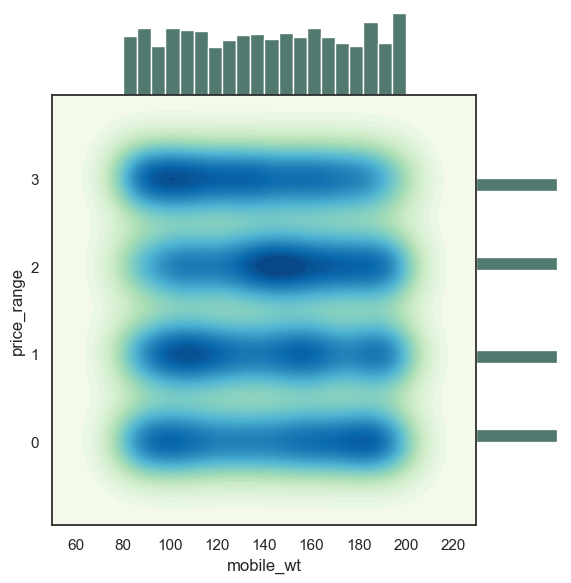

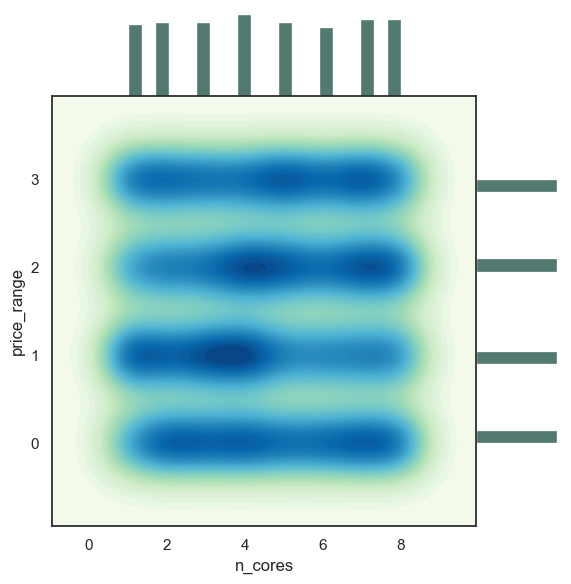

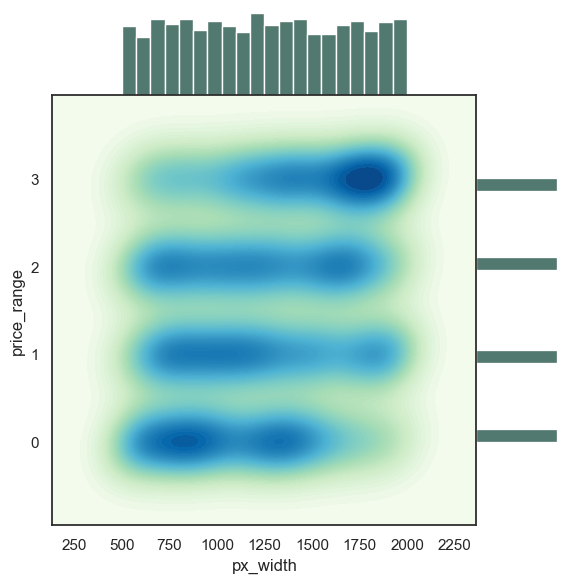

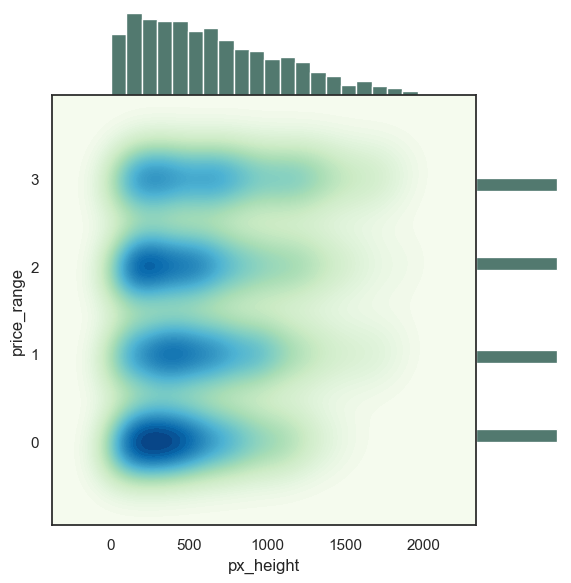

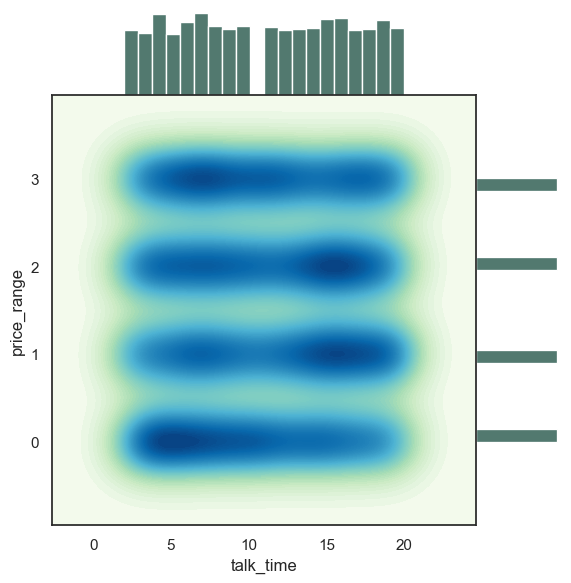

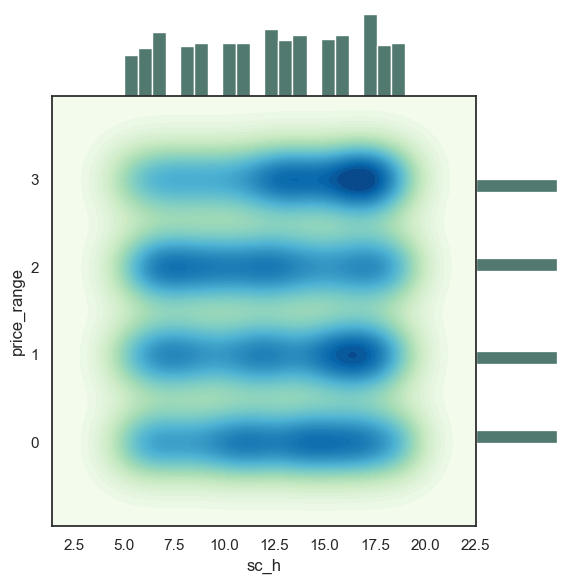

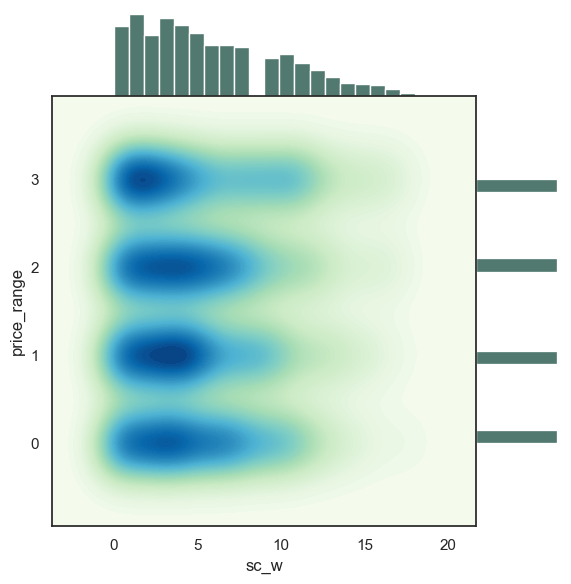

In [62]:
df_c=['battery_power','ram','clock_speed','int_memory','m_dep','mobile_wt',"n_cores","px_width","px_height","talk_time","sc_h","sc_w"]  
for i in df_c:
    sns.set_theme(style="white")
    g = sns.JointGrid(data=df, x=i,y='price_range',space=0)
    g.plot_joint(sns.kdeplot,fill=True,thresh=0, levels=100, cmap="GnBu")
    g.plot_marginals(sns.histplot, color="#52796f", alpha=1, bins=20)

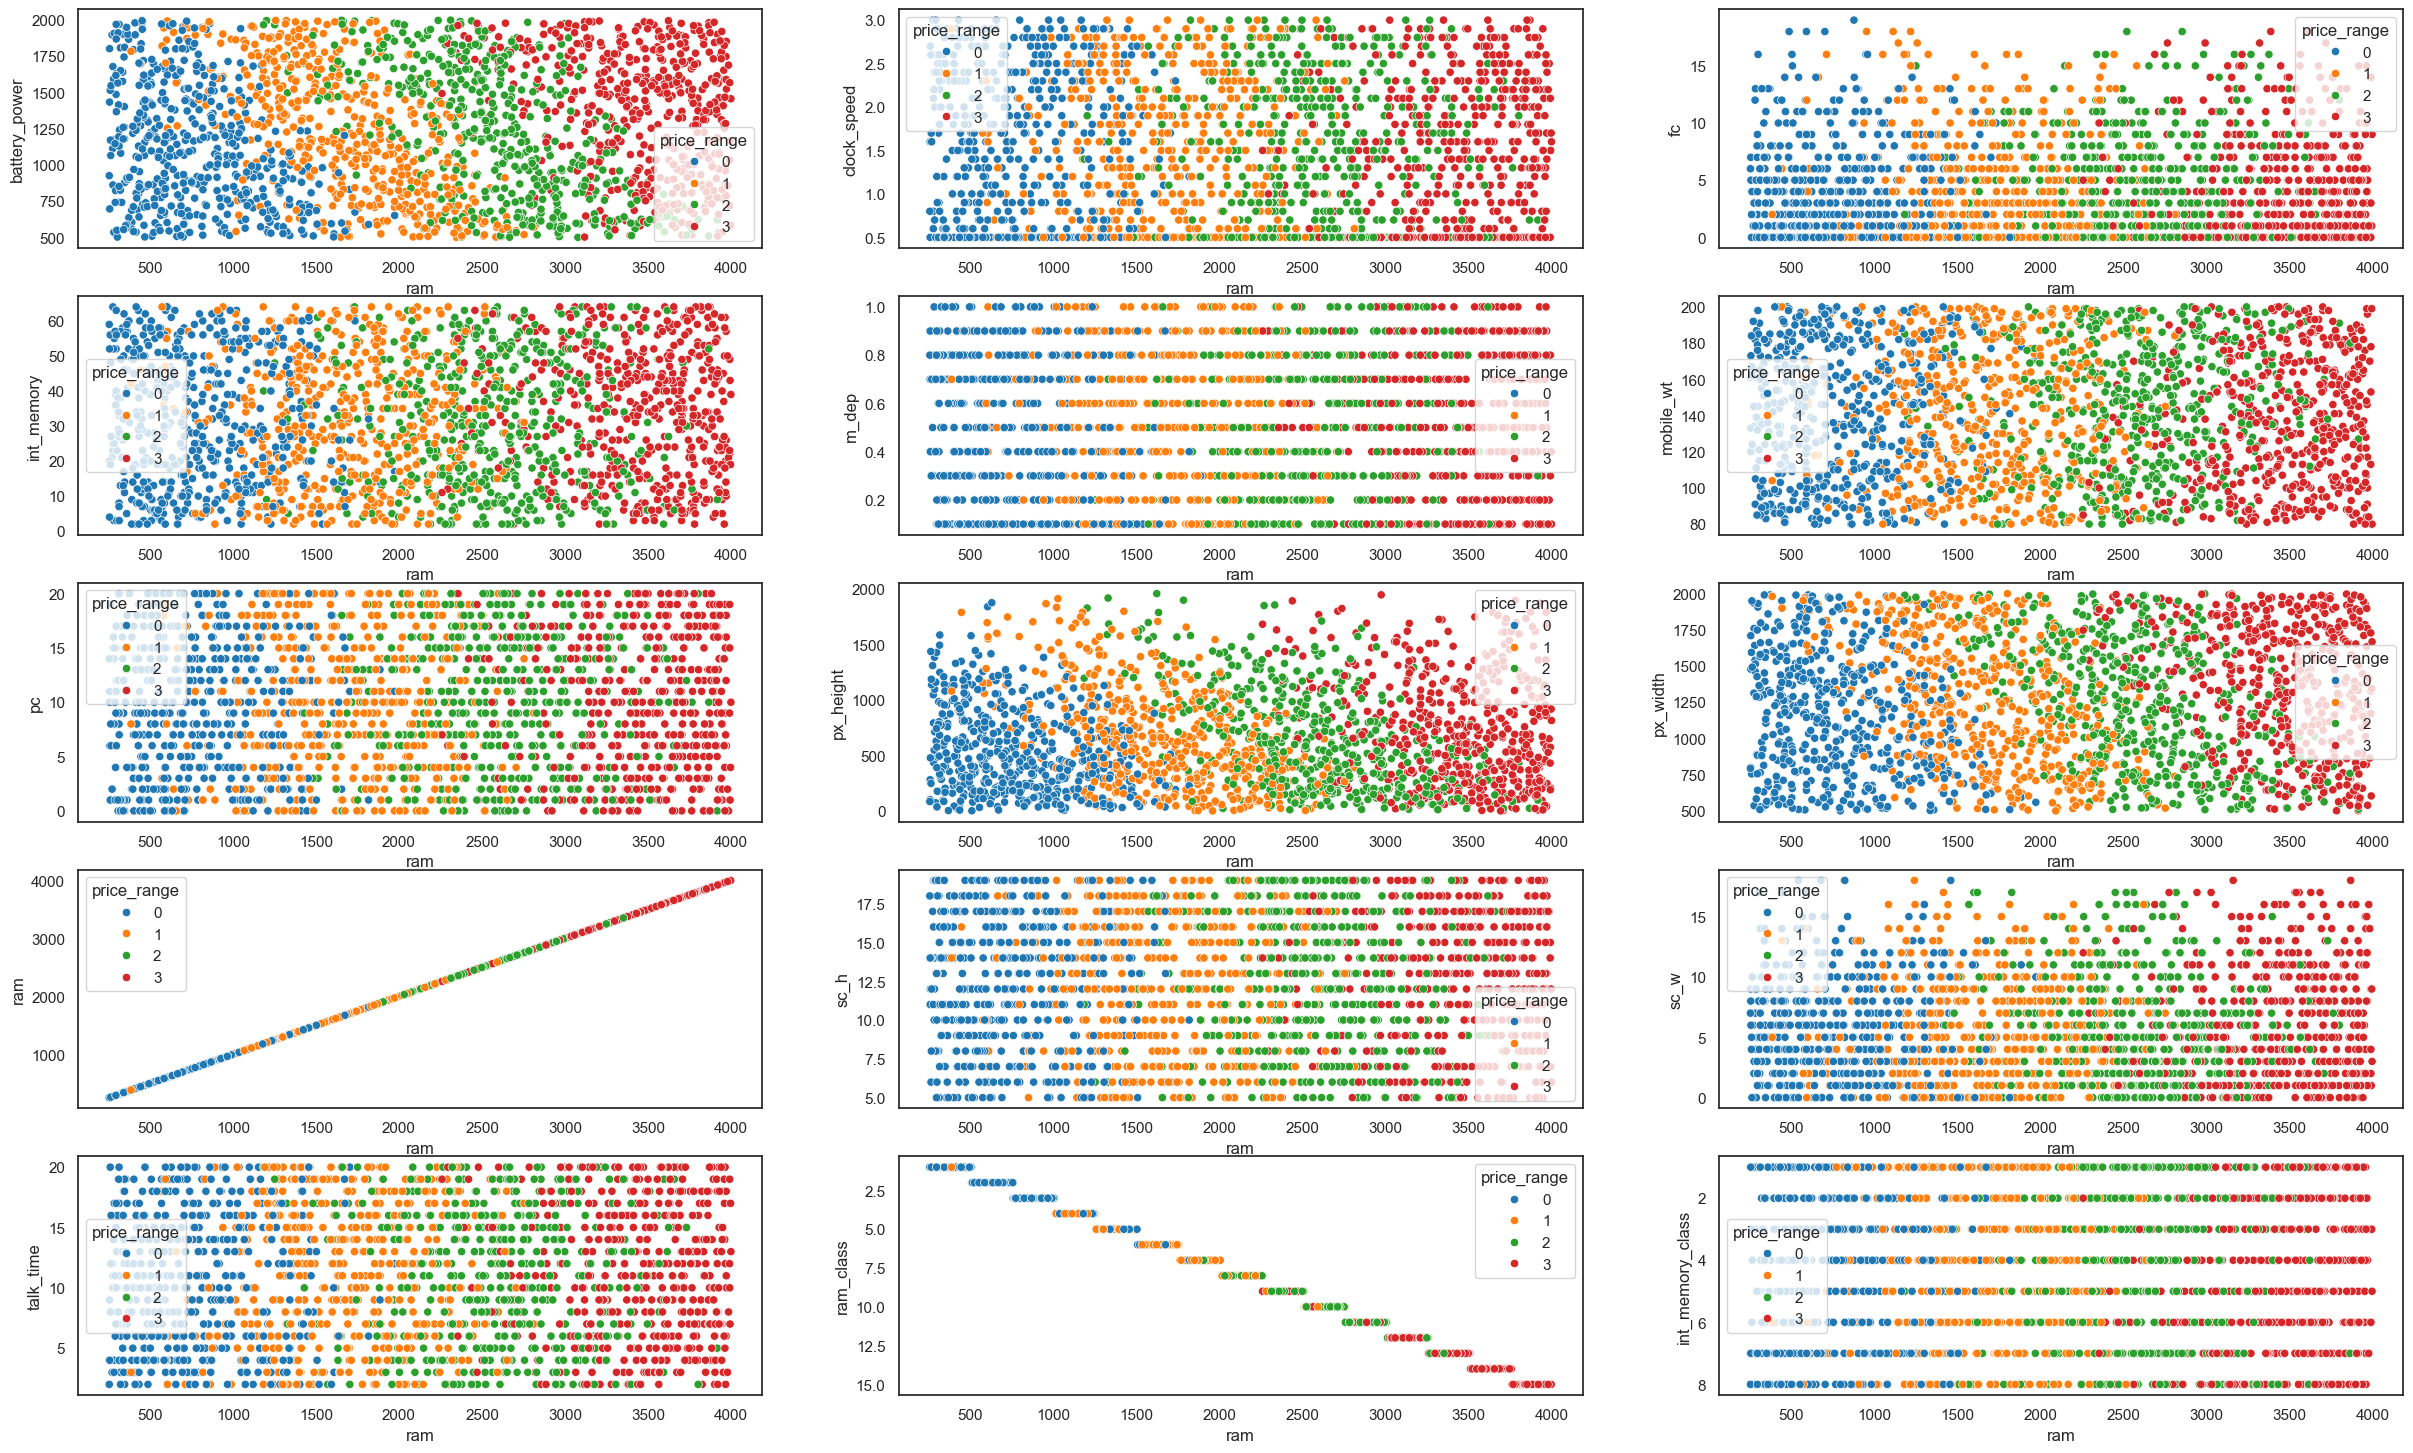

In [74]:
df_categorical = df[['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype(str)

# todas as colunas só para comparar com as categoricas que vou dropar
#['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']]

df_numerical = df.drop(df_categorical.columns, axis=1)

fig=plt.figure(figsize=(30,18))
for i,col in enumerate(df_numerical):
    if i==15:
        break
    ax=fig.add_subplot(5, 3,(i+1))
    sns.scatterplot(x='ram',y=col,hue='price_range',data=df,palette="tab10")

NameError: name 'df' is not defined